# Titanic Kaggle Competition

**Result:** .787808, Top 15%

# Overview of Steps
1. Feature Analysis
2. Feature Engineering
3. Data Preprocessing
4. Model Building
5. Model Tuning
6. Predict and Submit

# Import Data and split training and test data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math

%matplotlib inline

training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
training['Train'] = 1
test['Train'] = 0
training['Died'] = 1 - training.Survived
test['Survived'] = np.NaN
test['Died'] = np.NaN
combined = training.append(test)
combined.reset_index(inplace=True)
targets = training.Survived

# Notes Complilation
(compilation of notes write down as I analyze the features)

Female strong indicator of survival

Pclass 3 - most died

Women and Children most likely to survive

Passengers with cheap tickets died at a higher rate

Most from Port S Died

Names have titles, some are redundant and can be grouped together

Lots of missing Ages and Cabins

# Feature Analysis

**Gender**

counts

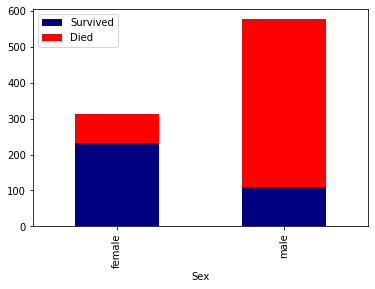

In [928]:
training.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar', stacked = True,
                                                            color =['navy','red'])

Percentage

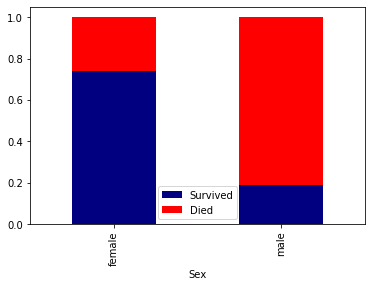

In [929]:
training.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind='bar', stacked = True,
                                                            color =['navy','r'])
#women more likely to survive

**Pclass**

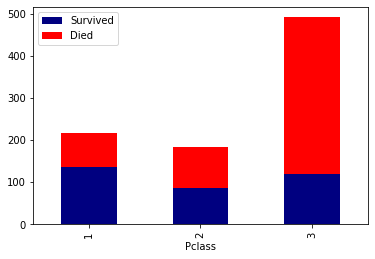

In [930]:
training.groupby('Pclass').agg('sum')[['Survived','Died']].plot(kind='bar', stacked = True,
                                                            color =['navy','r'])

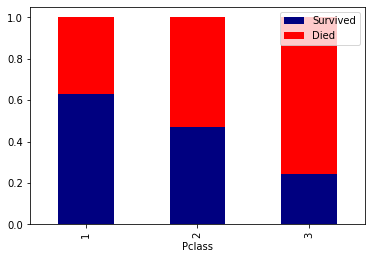

In [934]:
training.groupby('Pclass').agg('mean')[['Survived','Died']].plot(kind='bar', stacked = True,
                                                            color =['navy','r'])

In [22]:
training.groupby('Pclass').agg('mean')[['Survived','Died']]

,Survived,Died
Pclass,,
1,0.629630,0.370370
2,0.472826,0.527174
3,0.242363,0.757637


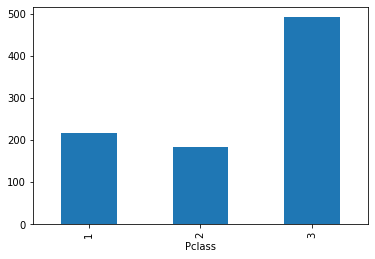

In [21]:
training.groupby('Pclass')['Pclass'].count().plot(kind='bar')

**Age**

/Users/khokibernier/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/khokibernier/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


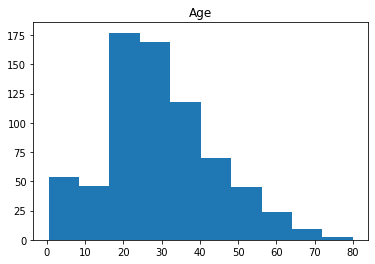

In [10]:
plt.hist(training['Age'], stacked=True)
plt.title('Age')
plt.show()

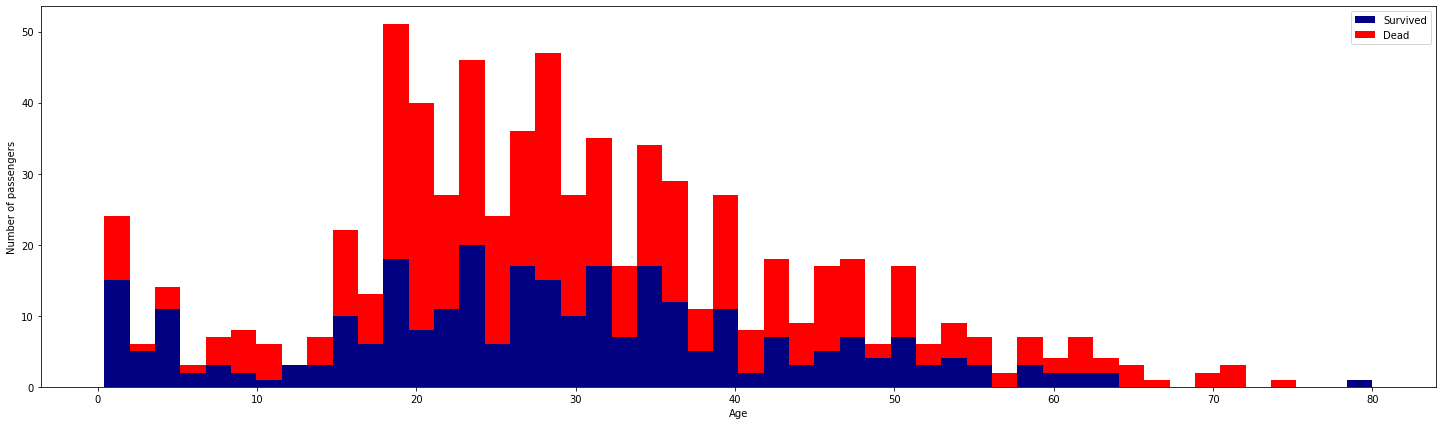

In [932]:
figure = plt.figure(figsize=(25, 7))
plt.hist([training[training['Survived'] == 1]['Age'], training[training['Survived'] == 0]['Age']], 
         stacked=True, color = ['navy','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend();

<Figure size 1440x2160 with 0 Axes>

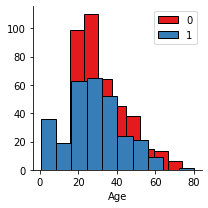

<Figure size 1440x2160 with 0 Axes>

In [12]:
g2 = sns.FacetGrid(training[['Age','Survived']],  hue="Survived", palette="Set1")
g2.map(plt.hist, 'Age',  ec="k")

plt.legend()
plt.figure(figsize=(20,30))

<Figure size 1440x2160 with 0 Axes>

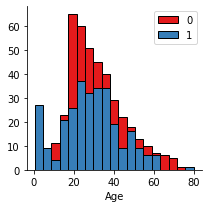

<Figure size 1440x2160 with 0 Axes>

In [13]:
#Children most likely to survive
g2 = sns.FacetGrid(training[['Age','Survived']],  hue="Survived", palette="Set1") #col="variable",col_wrap=2 , palette="Set1"

bins=np.linspace(training.Age.min(), training.Age.max(), 20)

g2.map(plt.hist, 'Age',  ec="k",bins=bins)#bins=bins,

plt.legend()
plt.figure(figsize=(20,30))

In [14]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
training['binned_age'] = pd.cut(training['Age'], bins)

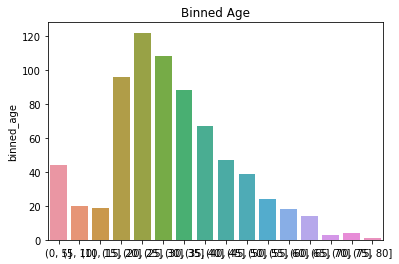

In [15]:
sns.barplot(training['binned_age'].value_counts().index, training['binned_age'].value_counts()).set_title('Binned Age')
plt.show()

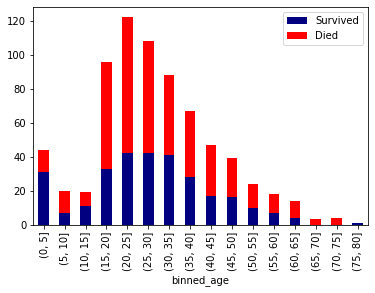

In [935]:
training.groupby('binned_age').agg('sum')[['Survived','Died']].plot(kind='bar', stacked = True,
                                                            color =['navy','r'])


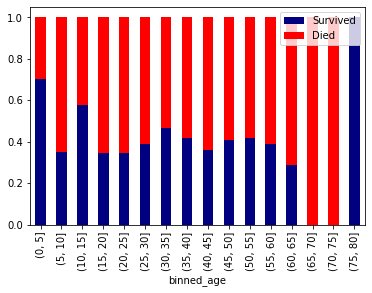

In [936]:
training.groupby('binned_age').agg('mean')[['Survived','Died']].plot(kind='bar', stacked = True,
                                                            color =['navy','r'])

**Fare Ticket**

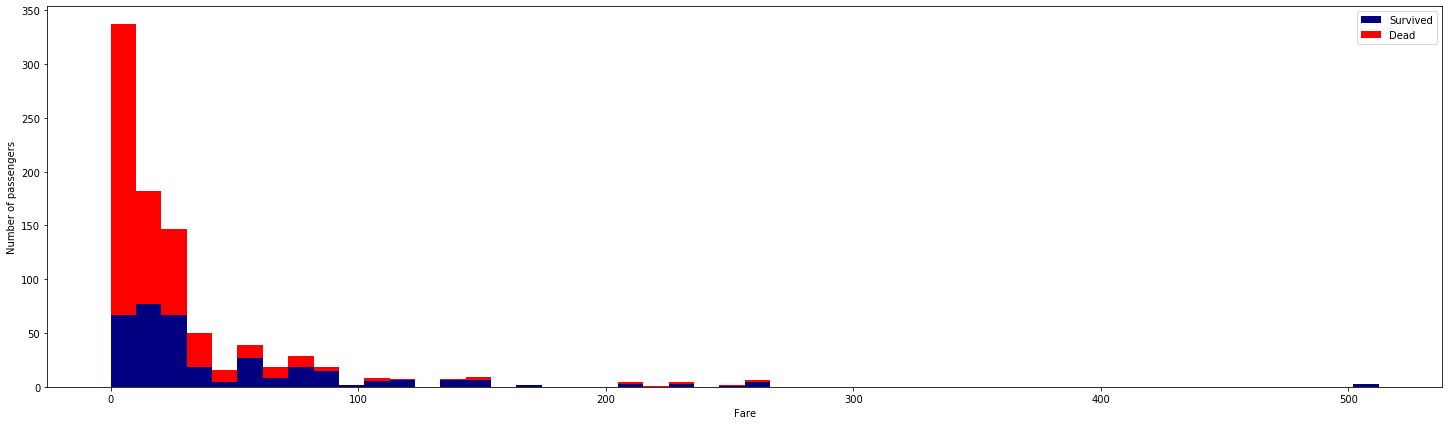

In [937]:
figure = plt.figure(figsize=(25, 7))
plt.hist([training[training['Survived'] == 1]['Fare'], training[training['Survived'] == 0]['Fare']], 
         stacked=True, color = ['navy','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [19]:
#Passengers with cheap tickets died at a higher rate

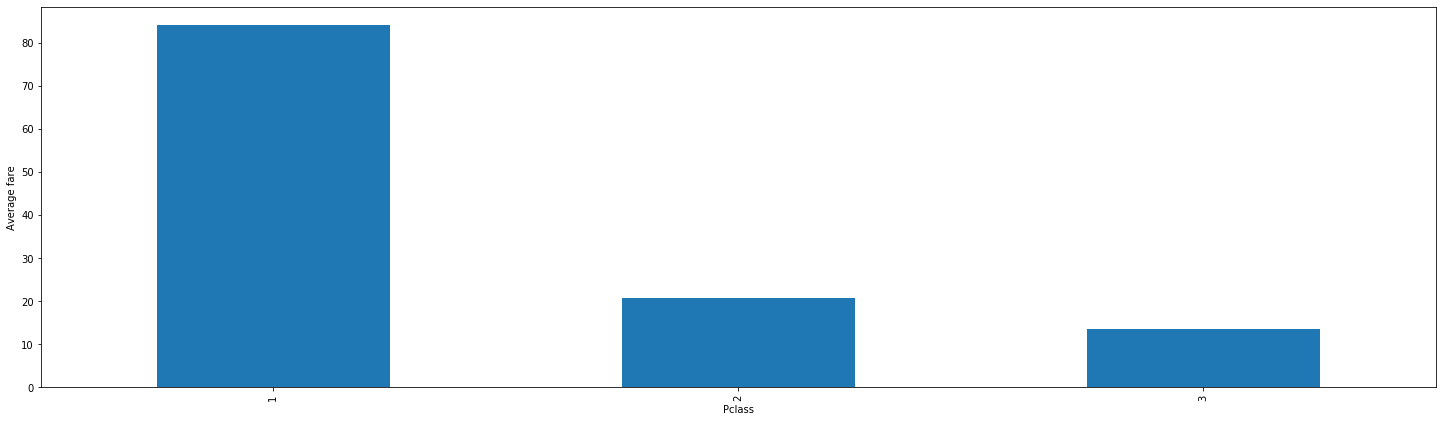

In [20]:
#Ticket price to class comparison
ax = plt.subplot()
ax.set_ylabel('Average fare')
training.groupby('Pclass')['Fare'].mean().plot(kind='bar', figsize=(25, 7), ax = ax);

**Embarked**

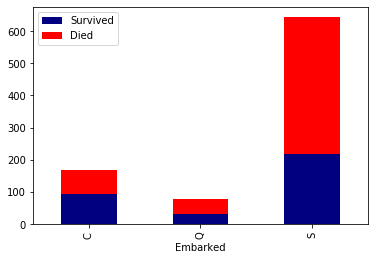

In [939]:
training.groupby('Embarked').agg('sum')[['Survived','Died']].plot(kind='bar',stacked=True,color=['navy','r'])

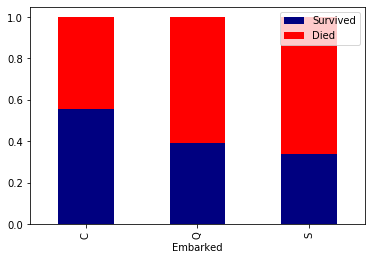

In [940]:
training.groupby('Embarked').agg('mean')[['Survived','Died']].plot(kind='bar',stacked=True,color=['navy','r'])

In [25]:
#most from port S died

**SibSp**

In [26]:
combined.groupby('SibSp')['PassengerId'].count()

SibSp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: PassengerId, dtype: int64

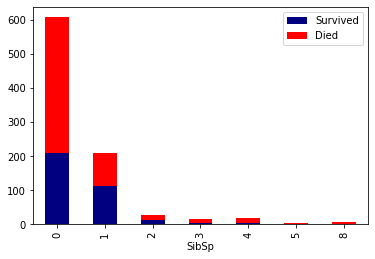

In [941]:
combined.groupby('SibSp')[['Survived','Died']].agg('sum').plot(kind='bar',stacked=True, color=['navy','red'])

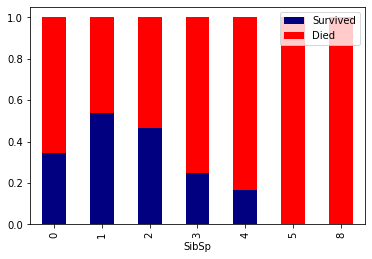

In [942]:
combined.groupby('SibSp')[['Survived','Died']].agg('mean').plot(kind='bar',stacked=True, color=['navy','red'])

In [29]:
#maybe group families by sizes (single, small (1,2), and large(3+))

**Parch**

In [30]:
combined.groupby('Parch')['PassengerId'].count()

Parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: PassengerId, dtype: int64

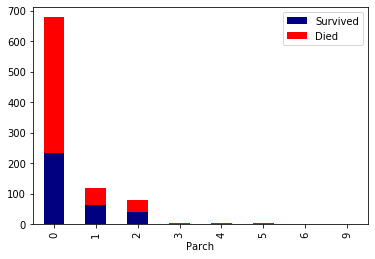

In [943]:
combined.groupby('Parch')[['Survived','Died']].agg('sum').plot(kind='bar',stacked=True, color=['navy','red'])

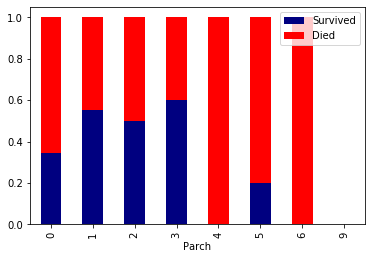

In [944]:
combined.groupby('Parch')[['Survived','Died']].agg('mean').plot(kind='bar',stacked=True, color=['navy','red'])

In [33]:
test.groupby('SibSp')['PassengerId'].count()

SibSp
0    283
1    110
2     14
3      4
4      4
5      1
8      2
Name: PassengerId, dtype: int64

# Feature Engineering

**Name Prefix**

Pull Name Prefix, then group redunancies/similar

In [34]:
combined['Name_Pre'] = combined.Name.apply(lambda x: x.split(',')[1].split('.')[0][1:])

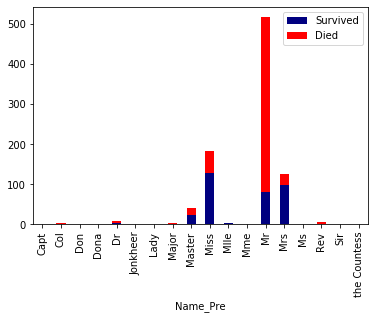

In [946]:
combined.groupby('Name_Pre').agg('sum')[['Survived','Died']].plot(kind='bar',stacked = True, color=['navy','red'])

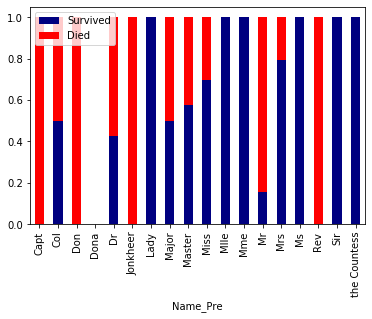

In [947]:
combined.groupby('Name_Pre').agg('mean')[['Survived','Died']].plot(kind='bar',stacked = True, color=['navy','red'])

In [166]:
sorted(combined['Name_Pre'].unique())
combined.groupby('Name_Pre')[['Survived','Died']].agg('sum')

,Survived,Died
Name_Pre,,
Capt,0.0,1.0
Col,1.0,1.0
Don,0.0,1.0
Dona,0.0,0.0
Dr,3.0,4.0
Jonkheer,0.0,1.0
Lady,1.0,0.0
Major,1.0,1.0
Master,23.0,17.0


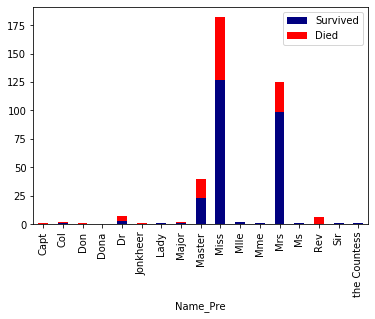

In [948]:
combined[combined.Name_Pre != 'Mr'].groupby('Name_Pre').agg('sum')[['Survived','Died']].plot(kind='bar',stacked = True, color=['navy','red'])

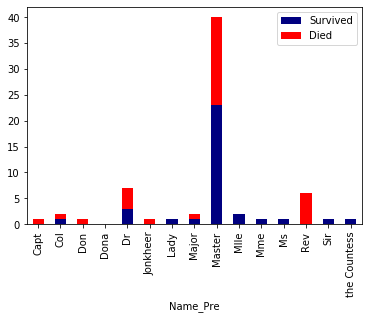

In [949]:
combined[(combined.Name_Pre != 'Mrs') & (combined.Name_Pre != 'Mr')&(combined.Name_Pre != 'Miss')].groupby('Name_Pre').agg('sum')[['Survived','Died']].plot(kind='bar',stacked = True, color=['navy','red'])

In [258]:
combined.Name_Pre.unique()
combined['Name_Pre_Group'] = combined['Name_Pre'].copy()
combined['Name_Pre_Group'] = combined['Name_Pre_Group'].replace(['Mrs','Mme'], 'Mrs')
combined['Name_Pre_Group'] = combined['Name_Pre_Group'].replace(['Ms','Miss','Mlle'], 'Ms')
combined['Name_Pre_Group'] = combined['Name_Pre_Group'].replace(['Don','Lady','Sir','the Countess','Dona','Jonkheer'], 'Elite')
combined['Name_Pre_Group'] = combined['Name_Pre_Group'].replace(['Rev','Dr','Col','Capt','Major'], 'Employee')

combined.Name_Pre_Group.unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Elite', 'Employee'], dtype=object)

**Missing Age Values**

Replace Missing Age values by predicting Age based on median age of similar Pclass and name prefix passengers

In [40]:
training.Age.isnull().sum()
df_age_replacer = combined.iloc[:].groupby(['Pclass','Name_Pre'])
df_age_replacer = df_age_replacer.median()
df_age_replacer = df_age_replacer.reset_index()[['Pclass','Name_Pre','Age']]
df_age_replacer

,Pclass,Name_Pre,Age
0,1,Capt,70.0
1,1,Col,54.5
2,1,Don,40.0
3,1,Dona,39.0
4,1,Dr,49.0
5,1,Jonkheer,38.0
6,1,Lady,48.0
7,1,Major,48.5
8,1,Master,6.0
9,1,Miss,30.0


In [41]:
combined[combined.Age.isna()==True].isna().sum()

index            0
PassengerId      0
Survived        86
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          240
Embarked         0
Train            0
Died            86
Name_Pre         0
dtype: int64

In [42]:
combined.groupby('Embarked')['Age'].median()
combined.groupby('Sex')['Age'].median()
combined.groupby('Pclass')['Age'].median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [43]:
def Age_Replace(row):
    if pd.isna(row.Age):
        if pd.isna(df_age_replacer[(df_age_replacer.Pclass == row.Pclass) & (df_age_replacer.Name_Pre == row.Name_Pre)]['Age'].values[0]):
            return combined.Age.median()
        else:
            return df_age_replacer[(df_age_replacer.Pclass == row.Pclass) & (df_age_replacer.Name_Pre == row.Name_Pre)]['Age'].values[0]

In [44]:
combined['Age2'] = combined.apply(lambda row: Age_Replace(row) if pd.isna(row['Age']) else row['Age'],axis=1)

**Fare**

Replace Null (only 1 value) with mean fare passenger Pclass

In [45]:
combined[combined.Fare.isna()==True]
combined.groupby('Pclass')['Fare'].mean()
combined['Fare'] = combined.Fare.fillna(13.302889)

**Embarked**

Replace null (only 2 values) with most common (s)

In [46]:
combined[combined.Embarked.isna()==True]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train,Died,Name_Pre,Age2
61,61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,0.0,Miss,38.0
829,829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,0.0,Mrs,62.0


In [47]:
#Majority of 1st class passengers embarked from S
combined[combined.Pclass == 1].groupby('Embarked')['PassengerId'].count()
combined['Embarked'] = combined.Embarked.fillna('S')

**Cabin**

Missing 1014 values

Tried multiple things:
- **Cabin First Letter, treat NaNs as seperate letter (best result)** - Cabin_letter
- Cabin First Letter, distribute NaNs based on Pclass percentages - Cabin_Matrix
- Cabin First Letter, distribute NaNs based on populated cabin percentages - Cabin_Fill
- Considered adding column for passengers with multiple columns, but did not - Cabin_Multiple

In [48]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [171]:
combined.Cabin.unique()
sorted(combined.groupby('Cabin')['PassengerId'].count())
combined['Cabin_letter'] = combined.Cabin.apply(lambda x: 'N' if pd.isna(x) else x[:1])
combined.groupby('Cabin_letter')['PassengerId'].count()

Cabin_letter
A      22
B      65
C      94
D      46
E      41
F      21
G       5
N    1014
T       1
Name: PassengerId, dtype: int64

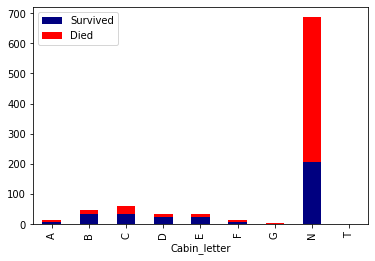

In [951]:
combined.groupby('Cabin_letter')[['Survived','Died']].agg('sum').plot(kind='bar',stacked=True,color=['navy','red'])

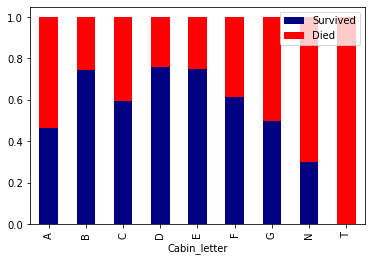

In [952]:
combined.groupby('Cabin_letter')[['Survived','Died']].agg('mean').plot(kind='bar',stacked=True, color=['navy','red'])

In [174]:
combined.groupby('Pclass')['Cabin_letter'].count()
pd.pivot_table(combined, index = 'Pclass',columns = 'Cabin_letter',values = 'Ticket', aggfunc='count')

Cabin_letter,A,B,C,D,E,F,G,N,T
Pclass,,,,,,,,,
1,22.0,65.0,94.0,40.0,34.0,NaN,NaN,67.0,1.0
2,NaN,NaN,NaN,6.0,4.0,13.0,NaN,254.0,NaN
3,NaN,NaN,NaN,NaN,3.0,8.0,5.0,693.0,NaN


In [175]:
combined.groupby('Cabin_letter')[['Survived','Died']].agg('mean')

,Survived,Died
Cabin_letter,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
N,0.299854,0.700146
T,0.000000,1.000000


In [177]:
#Could try filling NaN cabin letters by distrubuting the above based on %
#or fill cabin using Fare paid
combined.groupby('Cabin_letter')['Fare'].mean()

Cabin_letter
A     41.244314
B    122.383078
C    107.926598
D     53.007339
E     54.564634
F     18.079367
G     14.205000
N     19.126958
T     35.500000
Name: Fare, dtype: float64

In [360]:
combined[(combined.Cabin.isna()==False) & (combined.Pclass == '1')].groupby('Cabin_letter')['PassengerId'].count()

Cabin_letter
A    22
B    65
C    94
D    40
E    34
T     1
Name: PassengerId, dtype: int64

Create dataframe with Cabin letter, Pclass, and percentage of passengers in each cabin letter by Pclass

In [386]:
#P-Class 1
df_cabin_p1 = pd.DataFrame(combined[(combined.Cabin.isna()==False) & (combined.Pclass == '1')]['Cabin_letter'].value_counts(normalize=True))
df_cabin_p1['Pclass'] = 1
df_cabin_p1.rename(columns={'Cabin_letter': 'Pcntg'},inplace=True)
df_cabin_p1['Cabin_letter'] = df_cabin_p1.index

#P-Class 2
df_cabin_p2 = pd.DataFrame(combined[(combined.Cabin.isna()==False) & (combined.Pclass == '2')]['Cabin_letter'].value_counts(normalize=True))
df_cabin_p2['Pclass'] = 2
df_cabin_p2.rename(columns={'Cabin_letter': 'Pcntg'},inplace=True)
df_cabin_p2['Cabin_letter'] = df_cabin_p2.index

#P-Class 3
df_cabin_p3 = pd.DataFrame(combined[(combined.Cabin.isna()==False) & (combined.Pclass == '3')]['Cabin_letter'].value_counts(normalize=True))
df_cabin_p3['Pclass'] = 3
df_cabin_p3.rename(columns={'Cabin_letter': 'Pcntg'},inplace=True)
df_cabin_p3['Cabin_letter'] = df_cabin_p3.index

#combine
cabin_matrix = pd.concat([df_cabin_p1, df_cabin_p2,df_cabin_p3],)

In [387]:
cabin_matrix

,Pcntg,Pclass,Cabin_letter
C,0.367188,1,C
B,0.253906,1,B
D,0.156250,1,D
E,0.132812,1,E
A,0.085938,1,A
T,0.003906,1,T
F,0.565217,2,F
D,0.260870,2,D
E,0.173913,2,E
F,0.500000,3,F


Cabin_Matrix will be our Cabin NaNs populated using the table above

In [468]:
combined['Cabin_Matrix'] = combined.Cabin.str[:1].copy()

In [409]:
#67 null Pclass = 1
print('Pclass = 1: 67 nulls')
print('C: ',67*0.367188)
print('B: ',67*.253906)
print('D: ',67*0.156250)
print('E: ',67*0.132812)
print('A: ',67*0.085938)
print('T: ',67*0.003906)
print('')

#254 null Pclass = 2
print('Pclass = 2: 254 nulls')
print('F: ',254*0.565217)
print('D: ',254*0.260870)
print('E: ',254*0.173913)
print('')

#693 null Pclass = 3
print('Pclass = 3: 693 nulls')
print('F: ',693*0.500000)
print('G: ',693*0.312500)
print('E: ',693*0.187500)

Pclass = 1: 67 nulls
C:  24.601596
B:  17.011702
D:  10.46875
E:  8.898404000000001
A:  5.757846
T:  0.261702

Pclass = 2: 254 nulls
C:  143.56511799999998
B:  66.26098
D:  44.173902000000005

Pclass = 3: 693 nulls
C:  346.5
B:  216.5625
D:  129.9375


In [469]:
#Pclass 1
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='1')].Cabin_Matrix[0:25].index:
    combined.at[index,'Cabin_Matrix'] = 'C'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='1')].Cabin_Matrix[0:17].index:
    combined.at[index,'Cabin_Matrix'] = 'B'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='1')].Cabin_Matrix[0:10].index:
    combined.at[index,'Cabin_Matrix'] = 'D'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='1')].Cabin_Matrix[0:9].index:
    combined.at[index,'Cabin_Matrix'] = 'E'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='1')].Cabin_Matrix[0:5].index:
    combined.at[index,'Cabin_Matrix'] = 'A'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='1')].Cabin_Matrix[0:1].index:
    combined.at[index,'Cabin_Matrix'] = 'T'

In [470]:
#Pclass 2
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='2')].Cabin_Matrix[0:144].index:
    combined.at[index,'Cabin_Matrix'] = 'F'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='2')].Cabin_Matrix[0:66].index:
    combined.at[index,'Cabin_Matrix'] = 'D'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='2')].Cabin_Matrix[0:44].index:
    combined.at[index,'Cabin_Matrix'] = 'E'

In [471]:
#Pclass 3
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='3')].Cabin_Matrix[0:347].index:
    combined.at[index,'Cabin_Matrix'] = 'F'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='3')].Cabin_Matrix[0:217].index:
    combined.at[index,'Cabin_Matrix'] = 'G'
for index in combined[(combined['Cabin_Matrix'].isna()==True)&(combined.Pclass=='3')].Cabin_Matrix[0:129].index:
    combined.at[index,'Cabin_Matrix'] = 'E'

In [650]:
combined['Cabin_Multiple'] = combined.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split()))
combined.groupby('Cabin_Multiple')['PassengerId'].count()

Cabin_Multiple
0    1014
1     254
2      26
3      10
4       5
Name: PassengerId, dtype: int64

Cabin_Fill will be our Cabin NaNs populated based on distribution of populated cabins that we do have

In [777]:
combined['Cabin_Fill'] = combined.Cabin.str[:1].copy()
combined.Cabin_Fill

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Cabin_Fill, Length: 1309, dtype: object

In [779]:
#Cabin distribution percentage of populated cabins
combined[combined.Cabin_letter!='N']['Cabin_letter'].value_counts(normalize=True)

C    0.318644
B    0.220339
D    0.155932
E    0.138983
A    0.074576
F    0.071186
G    0.016949
T    0.003390
Name: Cabin_letter, dtype: float64

In [781]:
print('C: ',1014*0.318644)
print('B: ',1014*0.220339)
print('D: ',1014*0.155932)
print('E: ',1014*0.138983)
print('A: ',1014*0.074576)
print('F: ',1014*0.071186)
print('G: ',1014*0.016949)
print('T: ',1014*0.003390)

C:  323.105016
B:  223.423746
D:  158.11504799999997
E:  140.928762
A:  75.620064
F:  72.182604
G:  17.186286
T:  3.4374599999999997


In [784]:
#Fill
for index in combined[combined['Cabin_Fill'].isna()==True].Cabin_Matrix[0:323].index:
    combined.at[index,'Cabin_Fill'] = 'C'
for index in combined[combined['Cabin_Fill'].isna()==True].Cabin_Matrix[0:224].index:
    combined.at[index,'Cabin_Fill'] = 'B'
for index in combined[combined['Cabin_Fill'].isna()==True].Cabin_Matrix[0:158].index:
    combined.at[index,'Cabin_Fill'] = 'D'
for index in combined[combined['Cabin_Fill'].isna()==True].Cabin_Matrix[0:141].index:
    combined.at[index,'Cabin_Fill'] = 'E'
for index in combined[combined['Cabin_Fill'].isna()==True].Cabin_Matrix[0:76].index:
    combined.at[index,'Cabin_Fill'] = 'A'
for index in combined[combined['Cabin_Fill'].isna()==True].Cabin_Matrix[0:72].index:
    combined.at[index,'Cabin_Fill'] = 'F'
for index in combined[combined['Cabin_Fill'].isna()==True].Cabin_Matrix[0:17].index:
    combined.at[index,'Cabin_Fill'] = 'G'
for index in combined[combined['Cabin_Fill'].isna()==True].Cabin_Matrix[0:3].index:
    combined.at[index,'Cabin_Fill'] = 'T'

In [787]:
combined['Cabin_Fill'].value_counts(normalize=True)*100

C    31.856379
B    22.077922
D    15.584416
E    13.903743
A     7.486631
F     7.104660
G     1.680672
T     0.305577
Name: Cabin_Fill, dtype: float64

In [753]:
combined['Cabin_Matrix'].value_counts(normalize=True)*100

F    0.391138
E    0.170359
G    0.169595
D    0.093201
C    0.090909
B    0.062643
A    0.020626
T    0.001528
Name: Cabin_Matrix, dtype: float64

**Ticket**

ways to break up tickets

- **if contains string (best result)**

- first character

- Ticket Prefix

In [56]:
combined.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [57]:
def Contains_String(ticket):
    contains_string_var = 0
    for i in ticket:    
        if i.isnumeric() == False:
            contains_string_var = 1
    return contains_string_var

In [58]:
#Contains String? (Not Useful)

In [59]:
combined['Ticket_Contains_String'] = combined.Ticket.apply(lambda x: Contains_String(x))

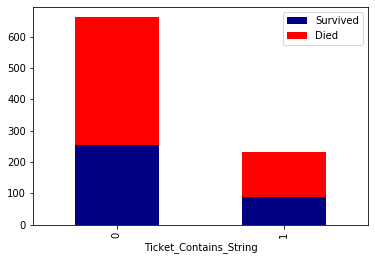

In [953]:
combined.groupby('Ticket_Contains_String')[['Survived','Died']].agg('sum').plot(kind='bar',stacked=True,color=['navy','red'])

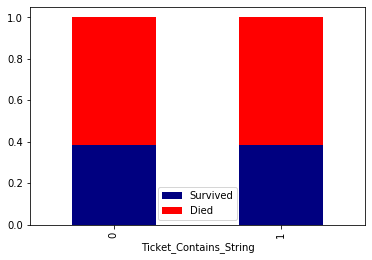

In [954]:
combined.groupby('Ticket_Contains_String')[['Survived','Died']].agg('mean').plot(kind='bar',stacked=True,color=['navy','red'])

In [62]:
#Ticket First character (probably useful)
combined['Ticket_FirstChar'] = combined.Ticket.str[:1]

In [63]:
combined.groupby('Ticket_FirstChar')['PassengerId'].count()

Ticket_FirstChar
1    210
2    278
3    429
4     11
5      3
6      9
7     13
8      2
9      2
A     42
C     77
F     13
L      5
P     98
S     98
W     19
Name: PassengerId, dtype: int64

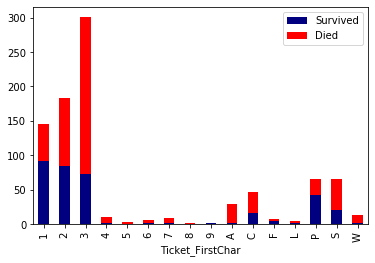

In [955]:
combined.groupby('Ticket_FirstChar')[['Survived','Died']].agg('sum').plot(kind='bar',stacked=True,color=['navy','red'])

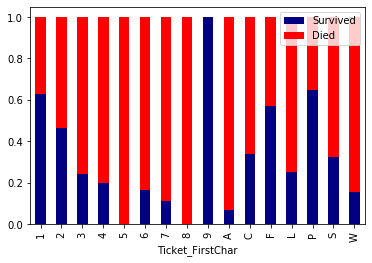

In [956]:
combined.groupby('Ticket_FirstChar')[['Survived','Died']].agg('mean').plot(kind='bar',stacked=True,color=['navy','red'])

In [296]:
combined.groupby('Ticket_FirstChar')['PassengerId'].count()

Ticket_FirstChar
1    210
2    278
3    429
4     11
5      3
6      9
7     13
8      2
9      2
A     42
C     77
F     13
L      5
P     98
S     98
W     19
Name: PassengerId, dtype: int64

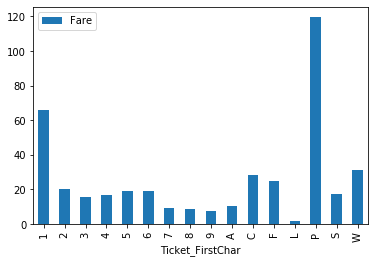

In [168]:
combined.groupby('Ticket_FirstChar')[['Fare']].agg('mean').plot(kind='bar',stacked=True)

In [302]:
pd.pivot_table(combined, index = 'Pclass',columns = 'Ticket_FirstChar',values = 'Ticket', aggfunc='count')

Ticket_FirstChar,1,2,3,4,5,6,7,8,9,A,C,F,L,P,S,W
Pclass,,,,,,,,,,,,,,,,
1,193.0,8.0,18.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,92.0,NaN,4.0
2,3.0,176.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,9.0,NaN,2.0,43.0,5.0
3,14.0,94.0,406.0,11.0,2.0,5.0,13.0,2.0,2.0,42.0,43.0,1.0,5.0,4.0,55.0,10.0


In [305]:
combined['Ticket_FirstChar_Group'] = combined.Ticket_FirstChar.copy()
combined['Ticket_FirstChar_Group'] = combined['Ticket_FirstChar_Group'].replace(['3','4','5','6','7','8','9','A','L'],'3')
combined['Ticket_FirstChar_Group'] = combined['Ticket_FirstChar_Group'].replace(['C','S'],'4')
combined['Ticket_FirstChar_Group'] = combined['Ticket_FirstChar_Group'].replace(['F'],'5')
combined['Ticket_FirstChar_Group'] = combined['Ticket_FirstChar_Group'].replace(['W'],'6')
combined['Ticket_FirstChar_Group'] = combined['Ticket_FirstChar_Group'].replace(['P'],'7')
combined.groupby('Ticket_FirstChar_Group')['PassengerId'].count()

Ticket_FirstChar_Group
1    210
2    278
3    516
4    175
5     13
6     19
7     98
Name: PassengerId, dtype: int64

In [571]:
combined['Ticket_Pre'] = combined.Ticket.apply(lambda x: 'Numeric' if x.isnumeric() == True else x.split()[0].replace('.','').replace('/','').upper())
combined['Ticket_Pre'].nunique()

36

In [572]:
combined.groupby('Ticket_Pre')['PassengerId'].count()

Ticket_Pre
A            1
A4          10
A5          28
AQ3          1
AQ4          1
AS           1
C            8
CA          68
CASOTON      1
FA           1
FC           3
FCC          9
LINE         4
LP           1
Numeric    957
PC          92
PP           4
PPP          2
SC           2
SCA3         1
SCA4         2
SCAH         5
SCOW         1
SCPARIS     19
SOC          8
SOP          1
SOPP         7
SOTONO2      3
SOTONOQ     24
SP           1
STONO       14
STONO2       7
STONOQ       1
SWPP         2
WC          15
WEP          4
Name: PassengerId, dtype: int64

# Data Preprocessing

Create Dummy Variables for: 'Age2', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Ticket_Contains_String', 'Name_Pre_Group', 'Cabin_letter', 'Train

Create the following Train datasets to run in our models and compare performance:

1. dataset as is
2. dataset with reduced features
3. dataset with scaled features
4. dataset with reduced and scaled features

In [820]:
combined.Pclass = combined.Pclass.astype(str)
#combined.Cabin_Multiple = combined.Cabin_Multiple.astype(str)

dummy_variables = pd.get_dummies(combined[['Age2','Fare','Pclass','Sex','SibSp','Parch','Embarked','Ticket_Contains_String','Name_Pre_Group','Cabin_letter','Train']])

In [821]:
x_train = pd.DataFrame(dummy_variables[dummy_variables.Train == 1].drop(['Train'],axis=1))
x_test = pd.DataFrame(dummy_variables[dummy_variables.Train == 0].drop(['Train'],axis=1))

y_train = combined[combined.Train == 1].Survived

In [822]:
dummy_variables.columns

Index(['Age2', 'Fare', 'SibSp', 'Parch', 'Ticket_Contains_String', 'Train',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Name_Pre_Group_Elite',
       'Name_Pre_Group_Employee', 'Name_Pre_Group_Master', 'Name_Pre_Group_Mr',
       'Name_Pre_Group_Mrs', 'Name_Pre_Group_Ms', 'Cabin_letter_A',
       'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E',
       'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_N', 'Cabin_letter_T'],
      dtype='object')

**Create another DF with Reduced Features to see if performs better**

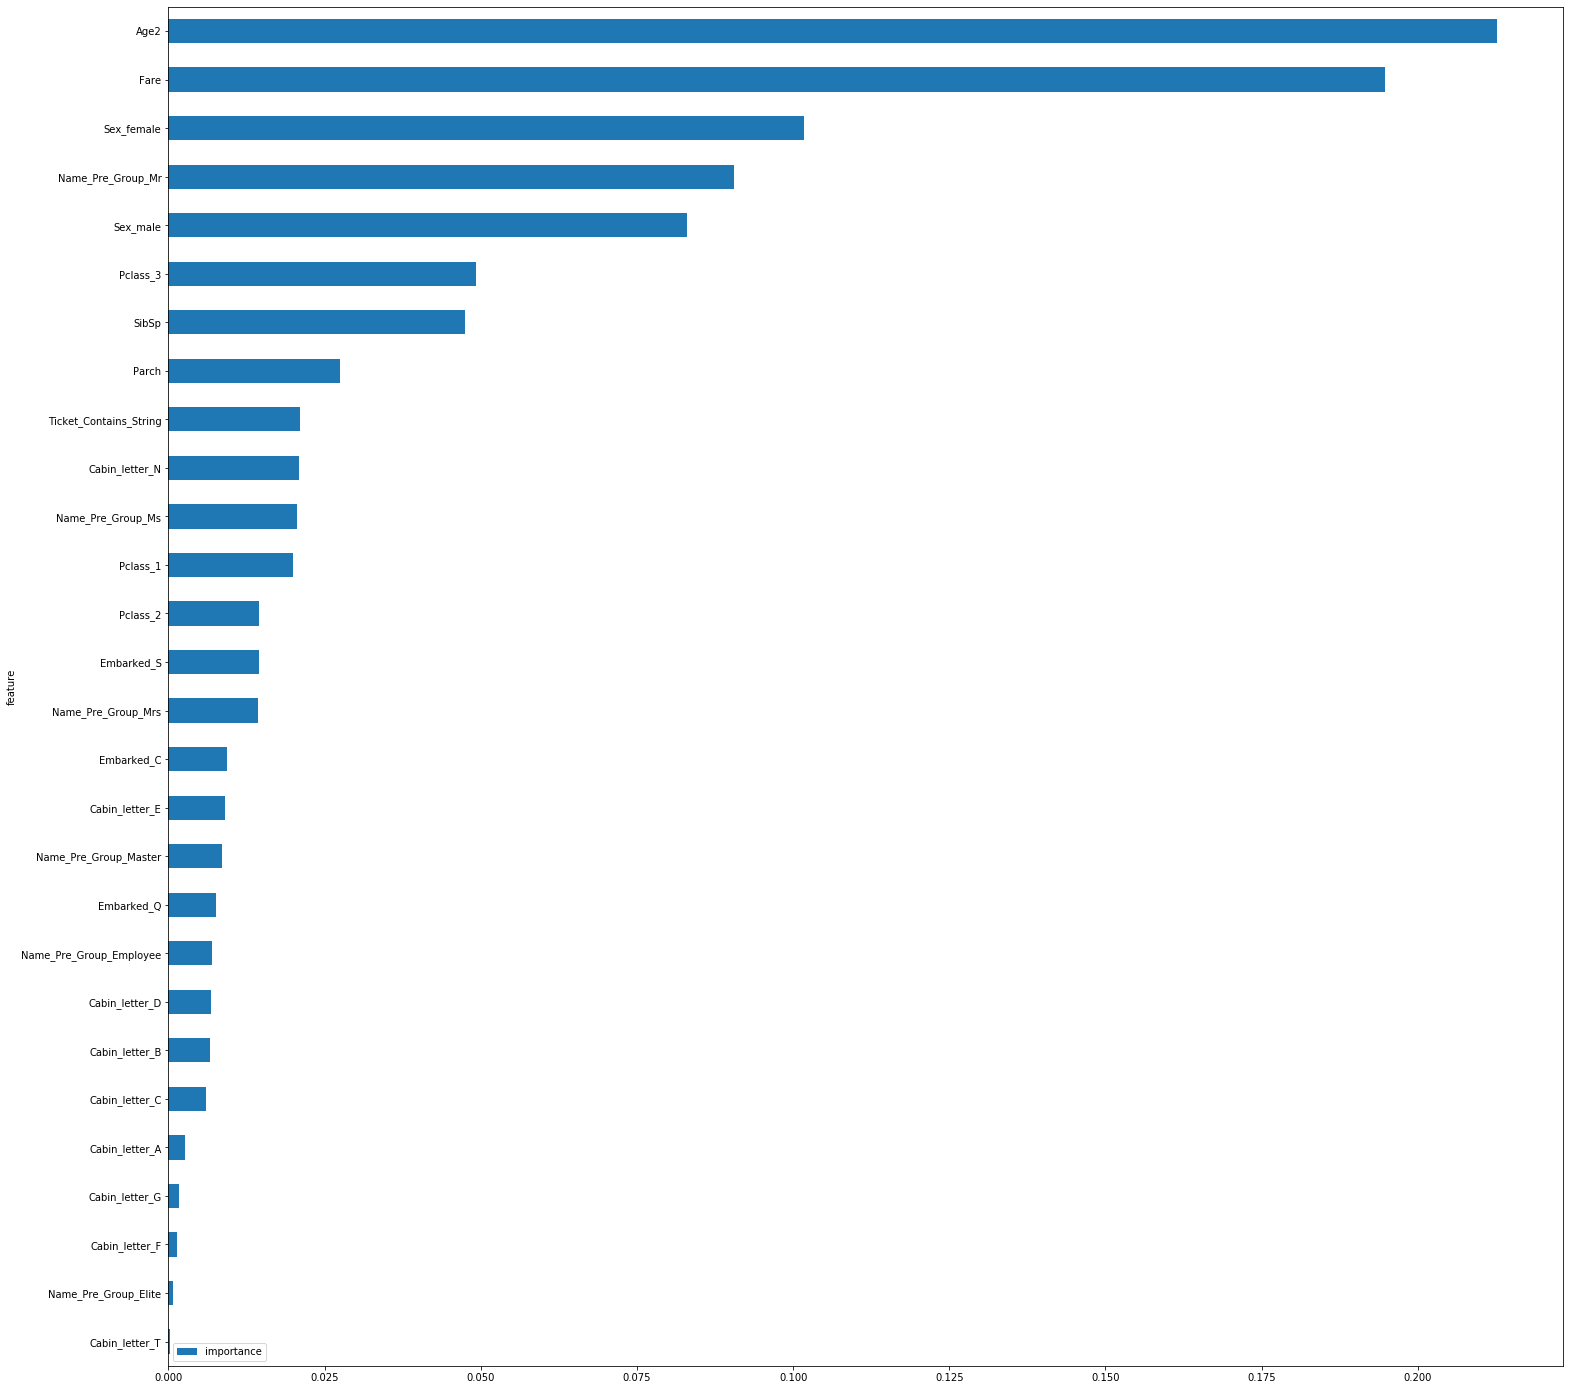

In [823]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(x_train, targets)

features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

#More Accurate when removed age2 and fare

In [824]:
model = SelectFromModel(clf, prefit=True)
x_train_reduced = model.transform(x_train)
x_test_reduced = model.transform(x_test)
print(x_train_reduced.shape)
print(x_train_reduced.shape)

(891, 7)
(891, 7)


In [825]:
feature_idx = model.get_support()
feature_name = x_train.columns[feature_idx]
feature_name

Index(['Age2', 'Fare', 'SibSp', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Name_Pre_Group_Mr'],
      dtype='object')

**Scale Data to see if it performs better this way**

In [826]:
from sklearn.preprocessing import StandardScaler

In [827]:
scale = StandardScaler()
dummy_variables_scaled = dummy_variables.copy()
#variables to Scale: Age2, Fare, SibSp, Parch
dummy_variables_scaled[['Age2','SibSp','Parch','Fare']] = scale.fit_transform(dummy_variables_scaled[['Age2','SibSp','Parch','Fare']])
dummy_variables_scaled.head()

,Age2,Fare,SibSp,Parch,Ticket_Contains_String,Train,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name_Pre_Group_Ms,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_N,Cabin_letter_T
0,-0.541304,-0.503271,0.481288,-0.445,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.649356,0.734756,0.481288,-0.445,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,-0.243639,-0.490220,-0.479087,-0.445,1,1,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,0.426107,0.383198,0.481288,-0.445,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.426107,-0.487804,-0.479087,-0.445,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [828]:
x_train_scaled = pd.DataFrame(dummy_variables_scaled[dummy_variables_scaled.Train == 1].drop(['Train'],axis=1))
x_test_scaled = pd.DataFrame(dummy_variables_scaled[dummy_variables_scaled.Train == 0].drop(['Train'],axis=1))

**Reduce Scaled Features to see if performance increases**

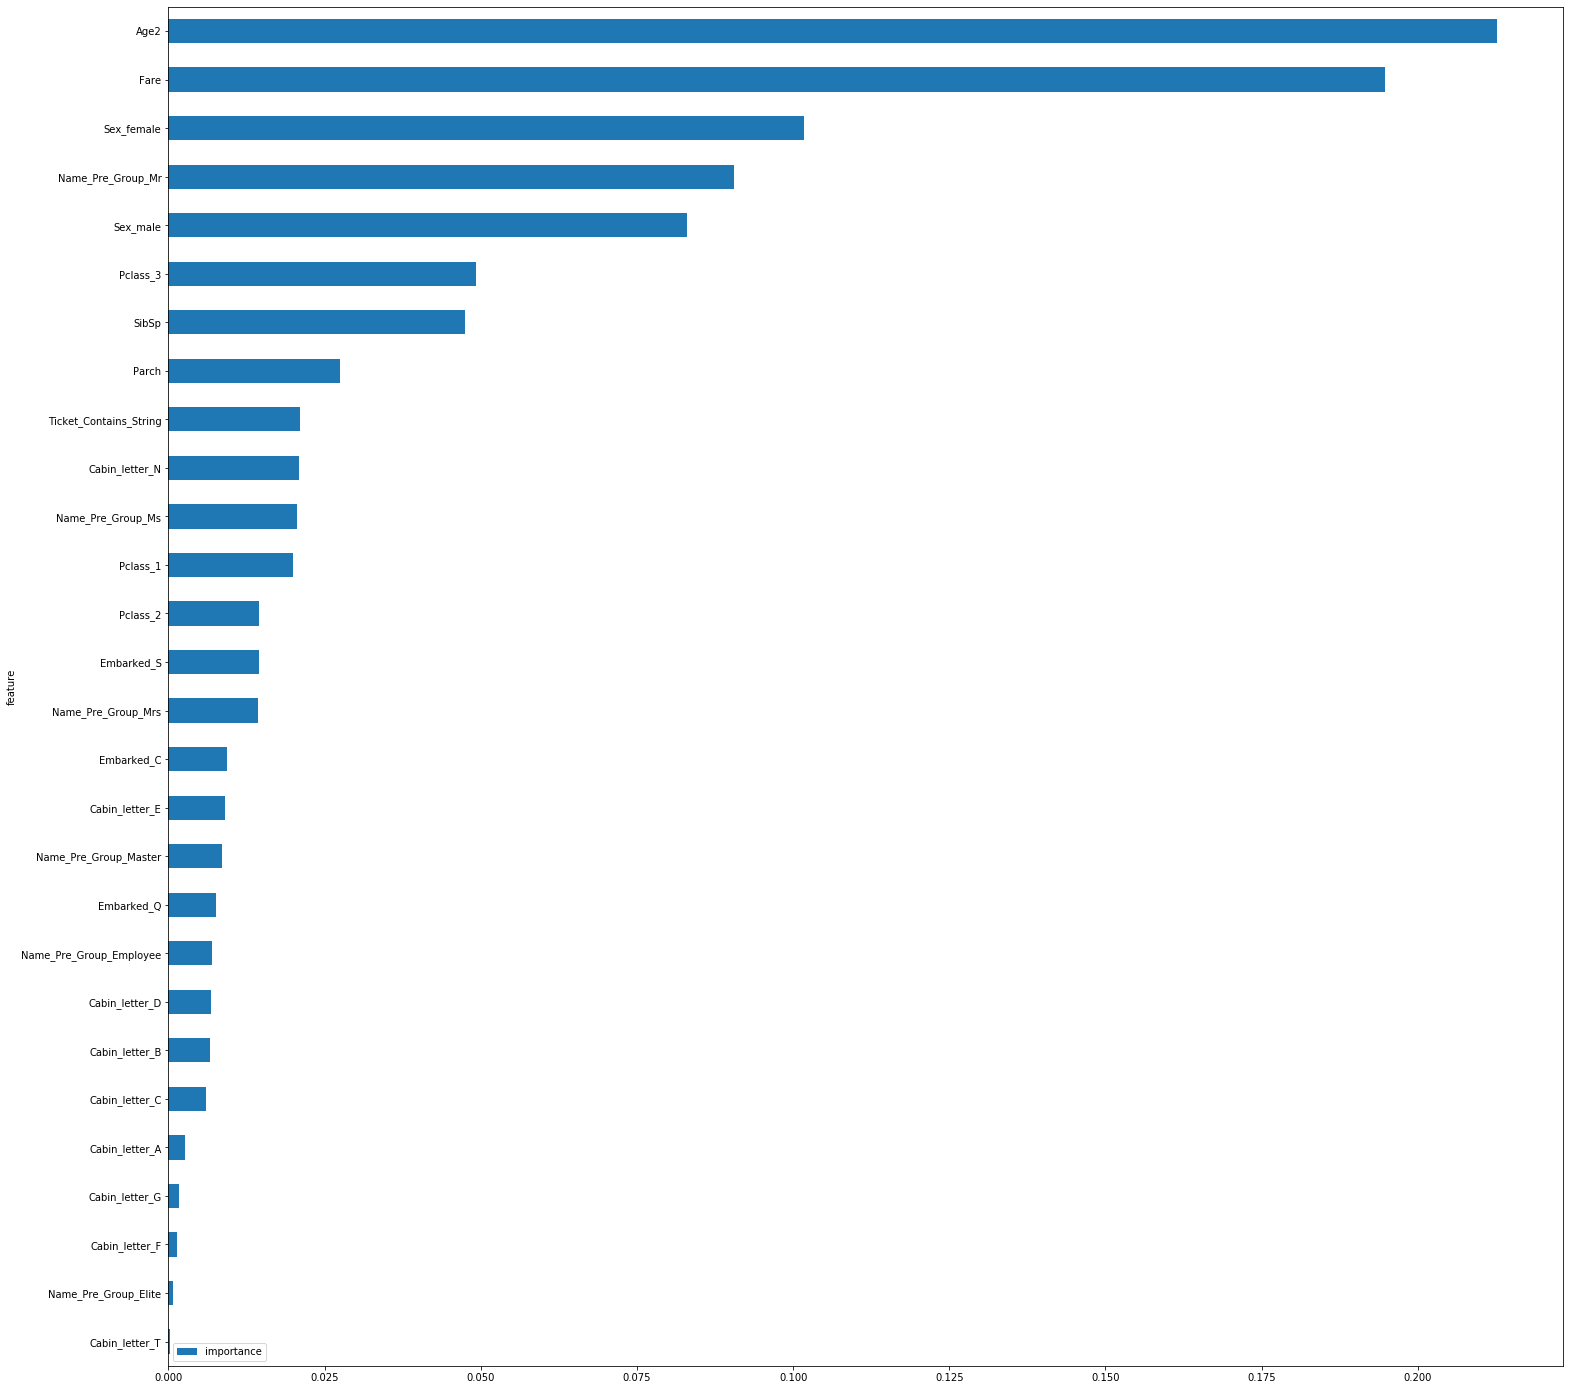

In [829]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(x_train_scaled, targets)

features_scaled = pd.DataFrame()
features_scaled['feature'] = x_train_scaled.columns
features_scaled['importance'] = clf.feature_importances_
features_scaled.sort_values(by=['importance'], ascending=True, inplace=True)
features_scaled.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

#More Accurate when removed age2 and fare

In [830]:
model = SelectFromModel(clf, prefit=True)
x_train_scaled_reduced = model.transform(x_train_scaled)
x_test_scaled_reduced = model.transform(x_test_scaled)
print(x_train_scaled_reduced.shape)
print(x_test_scaled_reduced.shape)

(891, 7)
(418, 7)


In [831]:
feature_idx = model.get_support()
feature_name = x_train_scaled.columns[feature_idx]
feature_name

Index(['Age2', 'Fare', 'SibSp', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Name_Pre_Group_Mr'],
      dtype='object')

# Modeling

In [718]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [719]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [720]:
training_data_formats = [x_train,        x_train_reduced,    x_train_scaled,  x_train_scaled_reduced]
training_data_type = ['Regular Features','Reduced Features','Scaled Features','Reduaced and Scaled Features']

**Common ML Models that I used:**

- Random Forest
- Logistic Regression
- Gradient Boost
- Naive Bayes
- Knearest Neighbor
- Linear SCV
- Soft Voting Classifier
- Hard Voting Classifier

I wanted to use either a hard voting or soft voting classifier that contained the top performing model of the 4 following categories:
1. Linear (Logistic Regression, Naive Bayes)
2. Decision Tree (Random Forest, XGBoost Classifier)
3. Kernel estimation (K Nearest Neighbor)
4. Support Vector Machines (Linear SCV)

**Random Forest Classifier**

In [832]:
rf = RandomForestClassifier(random_state = 1)
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(rf,i,y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  80.4695248258113
Reduced Features:  80.0238528654824
Scaled Features:  80.5818843763731
Reduaced and Scaled Features:  79.79913376435881


**Logistic Regression Model**

In [833]:
lr = LogisticRegression(max_iter = 2000)
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(lr,i,y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  83.27663046889711
Reduced Features:  79.79599522942691
Scaled Features:  83.1648986253217
Reduaced and Scaled Features:  79.9083547799887


**GradientBoosting Classifier**

In [834]:
gboost = GradientBoostingClassifier()
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(gboost,i,y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  82.26727763480007
Reduced Features:  82.04193082669009
Scaled Features:  82.26727763480007
Reduaced and Scaled Features:  82.04193082669009


**XGBoost Classifier**

In [835]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 1)
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(xgb,i,y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  81.5956311593748
Reduced Features:  79.90898248697506
Scaled Features:  81.70736300295023
Reduaced and Scaled Features:  80.02134203753688


**Gaussian Naive Bayes**

In [836]:
gnb = GaussianNB()
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(gnb,i,y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  78.11562362689098
Reduced Features:  79.01198920343984
Scaled Features:  76.09754566568327
Reduaced and Scaled Features:  79.01198920343984


**KNeighbords Classifier**

In [837]:
knn = KNeighborsClassifier()
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(knn,i,y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  70.48710062142992
Reduced Features:  71.0488983742389
Scaled Features:  81.48013307388112
Reduaced and Scaled Features:  80.69738246186681


**LinearSVC**

In [838]:
svc = SVC(probability = True)
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(svc,i,y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  67.57328479065971
Reduced Features:  67.34982110350887
Scaled Features:  83.49946644906157
Reduaced and Scaled Features:  83.05065595380077


**Voting Classifier**

In [327]:
from sklearn.ensemble import VotingClassifier

soft

In [839]:
voting_clf_soft = VotingClassifier(estimators = [('lr', lr),('rf', rf),('gboost', gboost),
                                            ('gnb', gnb),('knn', knn),('svc', svc)],
                                             voting='soft', flatten_transform=True)

In [840]:
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(voting_clf_soft,i, y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  80.81225284037413
Reduced Features:  81.14493754315487
Scaled Features:  82.94143493817087
Reduaced and Scaled Features:  83.05002824681438


Hard

In [729]:
voting_clf_hard = VotingClassifier(estimators = [('lr', lr),('rf', rf),('gboost', gboost),
                                            ('gnb', gnb),('knn', knn),('svc', svc)],
                                             voting='hard')

In [841]:
tdt_index = 0

for i in training_data_formats:
    score = cross_val_score(voting_clf_hard,i, y_train,cv=5)
    print(training_data_type[tdt_index]+': ', score.mean()*100)
    tdt_index+=1

Regular Features:  82.15554579122465
Reduced Features:  80.35904839620865
Scaled Features:  83.16301550436256
Reduaced and Scaled Features:  82.82656455966355


**Model Comparisons**

In [957]:
#training_data_type
models = [lr, rf, gboost, gnb, knn, svc, voting_clf_hard, voting_clf_soft]
model_names = ['Logistic Regression','Random Forest','Gradient Boost','Naive Bayes','K Nearest Neighbor',
               'Support Vector','Voting Hard','Voting Soft']
feature_type = []
model = []
scores = []

tdt_index = 0
model_index = 0

for m in models:
    for tdf in training_data_formats:
        score = cross_val_score(m,tdf, y_train,cv=5)
        
        feature_type.append(training_data_type[tdt_index])
        model.append(model_names[model_index])
        scores.append(score.mean()*100)
        
        tdt_index+=1
    tdt_index = 0
    model_index += 1

model_performance = pd.DataFrame()
model_performance['Feature_Type'] = feature_type
model_performance['Model'] = model
model_performance['Score'] = scores

/Users/khokibernier/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/khokibernier/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

In [958]:
from IPython.display import display
print('Regular Features')
display(model_performance[model_performance.Feature_Type == 'Regular Features'].sort_values(by = ['Score'],ascending=False,)[['Model','Score']].style.hide_index())
print('Reduced Features')
display(model_performance[model_performance.Feature_Type == 'Reduced Features'].sort_values(by = ['Score'],ascending=False,)[['Model','Score']].style.hide_index())
print('Scaled Features')
display(model_performance[model_performance.Feature_Type == 'Scaled Features'].sort_values(by = ['Score'],ascending=False,)[['Model','Score']].style.hide_index())
print('Reduced and Scaled Features')
display(model_performance[model_performance.Feature_Type == 'Reduaced and Scaled Features'].sort_values(by = ['Score'],ascending=False,)[['Model','Score']].style.hide_index())

Regular Features


Model,Score
Logistic Regression,83.052539
Voting Hard,82.155546
Gradient Boost,82.154918
Voting Soft,80.812253
Random Forest,80.469525
Naive Bayes,78.115624
K Nearest Neighbor,70.487101
Support Vector,67.573285


Reduced Features


Model,Score
Gradient Boost,82.041931
Voting Soft,81.144938
Voting Hard,80.246689
Random Forest,80.023853
Logistic Regression,79.908355
Naive Bayes,79.011989
K Nearest Neighbor,71.048898
Support Vector,67.349821


Scaled Features


Model,Score
Support Vector,83.499466
Logistic Regression,83.164899
Voting Hard,83.050656
Voting Soft,82.941435
Gradient Boost,82.154918
K Nearest Neighbor,81.480133
Random Forest,80.581884
Naive Bayes,76.097546


Reduced and Scaled Features


Model,Score
Support Vector,83.050656
Voting Soft,83.050028
Voting Hard,82.826565
Gradient Boost,82.041931
K Nearest Neighbor,80.697382
Logistic Regression,79.908355
Random Forest,79.799134
Naive Bayes,79.011989


# Model Tuning

In [97]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [98]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

**Logistic Regression**

In [844]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}


clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Logistic Regression
Best Score: 0.8305316678174629
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished


**Random Forest**

In [845]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [550, 600, 650],
               'criterion':['entropy'],#'gini',
                                  'bootstrap': [True],
                                  'max_depth': [40, 50, 60],
                                  'max_features': ['auto'],#,'sqrt'],
                                  'min_samples_leaf': [1,2],
                                  'min_samples_split': [7,10,13]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(x_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.5min finished


Random Forest
Best Score: 0.8327788588286987
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 550}


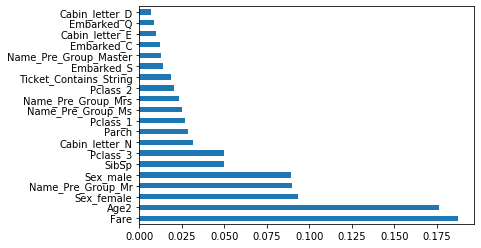

In [846]:
best_rf = best_clf_rf.best_estimator_.fit(x_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=x_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

**XGBoost**

In [847]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    #'n_estimators': [50, 100, 400, 500, 600],
    'colsample_bytree': [0.15, .2, .25],
    'max_depth': [13, 15, 17, None],
    #'reg_alpha': [0, 0.5, 1],
    #'reg_lambda': [1, 1.5, 2],
    #'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[0.45,0.5,0.55],
    'gamma':[1.8, 2, 2.2],
    'min_child_weight':[0,.001,.002]
    #'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(x_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGradient Boost')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   31.3s


XGradient Boost
Best Score: 0.8406377502981608
Best Parameters: {'colsample_bytree': 0.2, 'gamma': 1.8, 'learning_rate': 0.45, 'max_depth': None, 'min_child_weight': 0}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   32.8s finished


**K Nearest Neighbor**

In [848]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [4,5,6],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(x_train_scaled,y_train)
clf_performance(best_clf_knn,'K Nearest Neighbor')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


K Nearest Neighbor
Best Score: 0.8226853304877283
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished


**Support Vector**

In [849]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.095,.1,.105], 'C': [.65, .7, .75]}]#,
                                 #{'kernel': ['linear'], 'C': [.1, 1, 10, 100]},
                                 #{'kernel': ['poly'], 'degree' : [2,4], 'C': [.1, 1, 10, 100]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.7s remaining:    0.3s


SVC
Best Score: 0.8372418555018518
Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.9s finished


# Combining Models

In [850]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

#not planning to use RF
best_rf = best_clf_rf.best_estimator_

In [851]:
voting_hard_clf_scaled_tuned = VotingClassifier(estimators = [('lr',best_lr), ('knn',best_knn), ('svc',best_svc), ('xbg',best_xgb)], voting='hard')
cross_val_score(voting_hard_clf_scaled_tuned, x_train_scaled, y_train, cv=5).mean()*100

84.0631473228297

In [852]:
voting_soft_clf_scaled_tuned = VotingClassifier(estimators = [('lr',best_lr), ('knn',best_knn), ('svc',best_svc), ('xbg',best_xgb)], voting='soft')
cross_val_score(voting_soft_clf_scaled_tuned, x_train_scaled, y_train, cv=5).mean()*100

83.72606867114432

In [853]:
tuned_models = [best_lr, best_rf, best_xgb, best_knn, best_svc, voting_hard_clf_scaled_tuned, voting_soft_clf_scaled_tuned]
tuned_model_names = ['Logistic Regression','Random Forest','Gradient Boost','K Nearest Neighbor',
                     'Support Vector','Voting Hard','Voting Soft']

tuned_model = []
tuned_scores = []

model_index = 0

for tm in tuned_models:
    score = cross_val_score(tm,x_train_scaled, y_train,cv=5)
    tuned_scores.append(score.mean()*100)

for model_name in tuned_model_names:
    tuned_model.append(model_name)  

tuned_model_perf = pd.DataFrame()
tuned_model_perf['Model'] = tuned_model
tuned_model_perf['Tuned Score'] = tuned_scores
tuned_model_perf = pd.merge(model_performance[model_performance.Feature_Type == 'Scaled Features'].sort_values(by = ['Score'],ascending=False,)[['Model','Score','Feature_Type']], tuned_model_perf, how='inner',left_on=['Model'], right_on=['Model'])
tuned_model_perf['Score Difference'] = tuned_model_perf['Tuned Score'] - tuned_model_perf.Score

In [854]:
tuned_model_perf.sort_values(by=['Tuned Score'], ascending=False)[['Model','Score','Tuned Score','Score Difference']].style.hide_index()

Model,Score,Tuned Score,Score Difference
Gradient Boost,82.042559,84.063775,2.021216
Voting Hard,83.163016,84.063147,0.900132
Support Vector,83.499466,83.724186,0.224719
Voting Soft,82.941435,83.613709,0.672274
Random Forest,80.581884,83.277886,2.696002
Logistic Regression,83.164899,83.053167,-0.111732
K Nearest Neighbor,81.480133,82.268533,0.788400


# Make Prediction and Submit

In [919]:
voting_soft_clf_scaled_tuned.fit(x_train_scaled, y_train)
prediction = voting_soft_clf_scaled_tuned.predict(x_test_scaled).astype(int)

In [920]:
submission_data = {'PassengerId': test.PassengerId, 'Survived': prediction}
titanic_submission = pd.DataFrame(data=submission_data)

In [921]:
titanic_submission.to_csv('titanic_submission.csv', index =False)